In [1]:
####The main program file
import pandas as pd
import os
from config import (gkey)
import gmaps
from scipy.stats import linregress
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np


In [2]:
# Load Data File




In [2]:
###CALLLING OUT CSV FILE LOCATIONS
csv_path_1 = os.path.join ("..","Resources","Census_Data_2015.csv")
csv_path_2 = os.path.join("..", "Resources","Tract_lat_lon.csv")

### READING CSV DATA INTO DATA FRAMES
HV_maindata_1_df = pd.read_csv(csv_path_1)
HV_lat_lon_tract_df = pd.read_csv(csv_path_2)

###CHECKING DATA FRAME HEADS TO ENSURE DATA IS BEING CORRECLTY READ
HV_maindata_1_df.head()
HV_lat_lon_tract_df.head()

###MERGING TWO DATA FRAMES TO GET FINAL DATAFRAME WITH CENSUS AND GEOGROPHIC INFO COMBINED
# THE INNER MERGE WILL ONLY SHOW THOSE ROWS THAT HAVE INFO IN BOTH CSV FILES. IN DOING THIS WE LOST DATA OF 25 TRACT WHICH DID NOT HAVE LAT LONGS

HV_final_df = pd.merge(HV_maindata_1_df, HV_lat_lon_tract_df, on='CENSUSTRACT', how = 'inner')

###CHECKING DATA FRAME SHAPE TO SEE HOW MANY ROWS AND COLUMNS ARE THERE. 
###THIS HV_final_df IS THE DATA FRAME THAT CAN BE USED BY ALL TEAM MEMBERS FOR THEIR INDIVIDUAL PROCESSING


###OUTPUT THE FINAL DATA FRAME WITH LAT LON + CENSUS DATA INTO CSV FILE IN OUTPUT FOLDER
###HV_final_df.to_csv(os.path.join("..","Output", "Census_data_and_lat_lon.csv"), encoding = "utf-8", index = False)
HV_final_df.describe()

,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,LAT,LON
count,7.283900e+04,72839.000000,72839.000000,72839.000000,72839.000000,72839.000000,72839.000000,72839.000000,72839.000000,72839.000000,...,72839.000000,72839.000000,72839.000000,72839.000000,7.283900e+04,7.283900e+04,72839.000000,72839.000000,72839.000000,72839.000000
mean,2.783095e+10,0.757273,4237.158555,1601.808949,0.007084,109.618103,0.026963,0.126869,0.282157,0.111232,...,385.929337,692.856615,145.380428,207.062480,1.248869e+08,7.167768e+06,48.215085,2.767490,37.721283,-91.587277
std,1.581202e+10,0.428734,1972.633077,732.145280,0.083869,442.978105,0.095507,0.332828,0.450052,0.314421,...,528.825773,1117.981604,230.181632,187.164006,1.398027e+09,2.114814e+08,539.295934,81.653445,5.153027,16.215104
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,19.235605,-175.860041
25%,1.212708e+10,1.000000,2883.000000,1102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,83.000000,87.000000,37.000000,69.000000,1.787165e+06,0.000000e+00,0.690000,0.000000,33.981766,-97.913747
50%,2.712979e+10,1.000000,4002.000000,1521.000000,0.000000,7.000000,0.001777,0.000000,0.000000,0.000000,...,185.000000,240.000000,84.000000,158.000000,4.876582e+06,2.834100e+04,1.883000,0.011000,38.794105,-86.860018
75%,4.103900e+10,1.000000,5323.000000,2018.000000,0.000000,63.000000,0.015516,0.000000,1.000000,0.000000,...,446.000000,746.000000,172.000000,293.000000,3.428998e+07,5.391965e+05,13.239500,0.208000,41.393828,-80.015688
max,5.604595e+10,1.000000,37452.000000,16043.000000,1.000000,19496.000000,1.000000,1.000000,1.000000,1.000000,...,8839.000000,15420.000000,6176.000000,2152.000000,2.220000e+11,2.597330e+10,85554.431000,10028.348000,71.287519,179.621188


In [3]:
#GEOMAPPING CENSUS FOOD DESERT DATA

In [3]:
### CONFIGURING GMAP WITH API KEYS

gmaps.configure (api_key = gkey)

In [4]:
###GETTING TWO VARIABLES FROM MAIN DATAFRAME - (A) LAT LON AND (B) FOOD DESERT SCORE

HV_location = HV_final_df [["LAT", "LON"]]
HV_FD_Score = HV_final_df ["Food Desert Score"]

In [5]:
###CREATING FOOD DESERT HEATMAP LAYER

# CREATE THE MAP
HV_fig = gmaps.figure()

# CREATE HEATMAP LAYER USING HV_LOCATION AND HV_FD_SCORE (FOOD DESERT SCORE)
HV_heat_layer = gmaps.heatmap_layer(HV_location, weights=HV_FD_Score, 
                                 dissipating=False, max_intensity=3,
                                 point_radius=.1)
# Add heatmap layer to figure
HV_fig.add_layer(HV_heat_layer)

# Display the figure
HV_fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
#IS THERE CORRELATION BETWEEN FOOD DESERT EXISTENCE AND AMOUNT OF SNAP BENEFITS

In [16]:
#NORMALIZING TRACT SPECIFIC SNAP HOUSEHOLDS

#DIVIDING HOUSEHOLDS RECEIVING SNAP BENEFITS BY TOTAL NUMBER OF HOUSEHOLDS AND ADDING A NEW COLUMN SNAPNorm TO THE FINAL DATA FRAME

HV_final_df ["SNAPNorm"] = HV_final_df ["TractSNAP"]/HV_final_df ["OHU2010"]*100

#REMOVING TRACT THOSE HAVE ZERO TOTAL HOUSEHOLDS
HV_final_final_df = HV_final_df[HV_final_df ["OHU2010"] !=0]

#REMOVING TRACT THOSE HAVE MORE HOUSEHOLDS RECEIVING SNAP BENEFITS VS TOTAL NUMBER OF HOUSEHOLDS. THE ASSUMPTION IS THAT MAX ONE HOUSEHOLDS CAN RECEIVE ONE INSTANCE OF SNAP BENEFIT
HV_final_final_df = HV_final_final_df [HV_final_final_df["SNAPNorm"] <=100]

HV_final_final_df.head()

##DEFINING FOUR DATAFRAMES ONE EACH WITH FOOD DESERT SCORES OF 0, 1, 2 AND 3. 0 MEANS NO IMPACT AND 3 MEANS HIGHEST IMPACT

#VARIABLE SEGREGATING HOUSEHOLDS WITH ANY FD IMPACT
HV_FD_score_not_0 = HV_final_df[HV_final_df ["Food Desert Score"]!=0]
HV_FD_score_1 = HV_final_final_df[HV_final_final_df ["Food Desert Score"]==1]
HV_FD_score_2 = HV_final_final_df[HV_final_final_df ["Food Desert Score"]==2]
HV_FD_score_3 = HV_final_final_df[HV_final_final_df ["Food Desert Score"]==3]
HV_FD_score_0 = HV_final_final_df[HV_final_final_df ["Food Desert Score"]==0]


HV_FD_score_1.head()
#HV_SNAPNorm_1
#HV_SNAPNorm_2
#HV_SNAPNorm_3

#EXTRACTING POPULATION COUNT WITH SOME FD IMPACT
HV_Total_Pop_FD = HV_FD_score_not_0 ["POP2010"].sum()

#CALCULATING PERCENTAGE OF POPULATION IMPACTED BY FD
HV_Percent_Pop_FD = HV_FD_score_not_0 ["POP2010"].sum()/HV_final_df ["POP2010"].sum()*100
#print (HV_Total_Pop_FD,HV_Percent_Pop_FD)

#VARIABLE CHECK BELOW TO UNDERSTAND THE MEAN OF HOUSEHOLDS RECEIVING SNAP BENEFITS ACROSS VARIOUS FOOD DESERT SCORED TRACTS
HV_final_final_df.describe()

,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractHispanic,TractHUNV,TractSNAP,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,LAT,LON,SNAPNorm
count,7.239100e+04,72391.000000,72391.000000,72391.000000,72391.000000,72391.000000,72391.000000,72391.000000,72391.000000,72391.000000,...,72391.000000,72391.000000,72391.000000,7.239100e+04,7.239100e+04,72391.000000,72391.000000,72391.000000,72391.000000,72391.000000
mean,2.782966e+10,0.760633,4259.737730,1611.716498,0.005636,106.667279,0.025633,0.127557,0.283695,0.111823,...,696.324281,146.270807,208.332348,1.252477e+08,5.959269e+06,48.354338,2.300886,37.727297,-91.593027,13.931388
std,1.581644e+10,0.426700,1953.580047,723.459646,0.074862,424.291090,0.088098,0.333599,0.450794,0.315151,...,1119.790116,230.608646,187.035539,1.401611e+09,2.068871e+08,540.677808,79.879569,5.146900,16.194708,12.218464
min,1.001020e+09,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.215800e+04,0.000000e+00,0.009000,0.000000,19.235605,-166.770979,0.000000
25%,1.212708e+10,1.000000,2902.000000,1110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,88.000000,37.000000,70.000000,1.799600e+06,0.000000e+00,0.695000,0.000000,33.984190,-97.919654,4.838710
50%,2.712979e+10,1.000000,4014.000000,1526.000000,0.000000,7.000000,0.001801,0.000000,0.000000,0.000000,...,243.000000,85.000000,159.000000,4.898249e+06,2.799400e+04,1.891000,0.011000,38.796209,-86.876516,10.602549
75%,4.103900e+10,1.000000,5331.000000,2022.000000,0.000000,63.000000,0.015517,0.000000,1.000000,0.000000,...,751.000000,173.000000,294.000000,3.460679e+07,5.301745e+05,13.362000,0.205000,41.395769,-80.029176,19.407676
max,5.604595e+10,1.000000,37452.000000,16043.000000,1.000000,19496.000000,0.999847,1.000000,1.000000,1.000000,...,15420.000000,6176.000000,2152.000000,2.220000e+11,2.597330e+10,85554.431000,10028.348000,71.287519,179.621188,100.000000


In [ ]:
###PERFORMING REGRESSION ON FOOD DESERT SCORE AS INDEPENDENT AND SNAPNORM (SNAP BENEFITS PERCENT) AS DEPENDENT VARIABLE

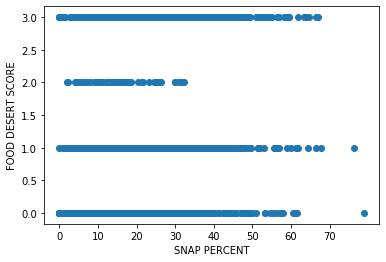

In [84]:
# SCATTER PLOT FIRST BETWEEN TWO VARIABLES

HV_final_Texas_df = HV_final_final_df [HV_final_final_df["State"]== "Texas"]
FD_SCORE = HV_final_Texas_df["Food Desert Score"]
SNAP_PERCENT = HV_final_Texas_df ["SNAPNorm"]

plt.scatter(SNAP_PERCENT, FD_SCORE)
plt.xticks(np.arange(min(SNAP_PERCENT), max(SNAP_PERCENT)+1, 10))
plt.xlabel('SNAP PERCENT')
plt.ylabel('FOOD DESERT SCORE')
plt.show()

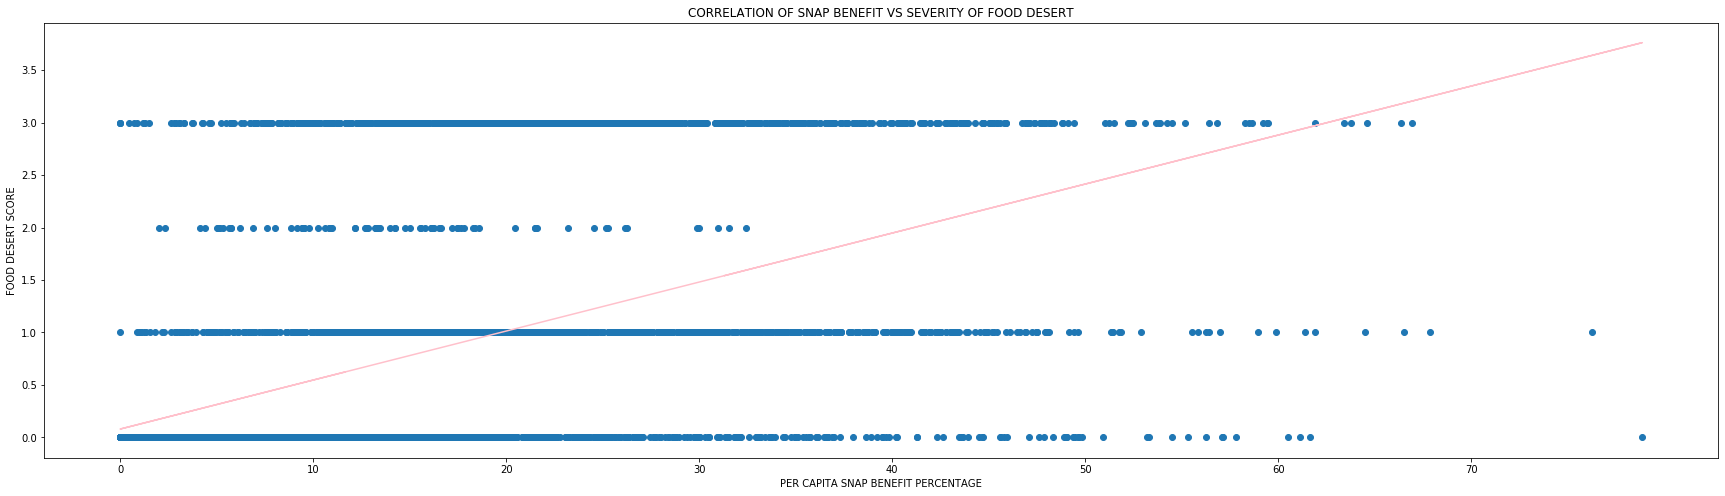

In [85]:
FDSNAP_TX_slope, FDSNAP_TX_int, FDSNAP_TX_r, FDSNAP_TX_p, FDSNAP_TX_std_err = stats.linregress(SNAP_PERCENT,FD_SCORE)

FDSNAP_TX_fit = FDSNAP_TX_slope * SNAP_PERCENT + FDSNAP_TX_int

plt.figure (figsize = (30,8))
plt.scatter (SNAP_PERCENT, FD_SCORE)
plt.plot (SNAP_PERCENT, FDSNAP_TX_fit, linestyle = 'solid', color = 'pink')
plt.xticks (np.arange(min(SNAP_PERCENT), max(SNAP_PERCENT)+1, 10))
plt.title ("CORRELATION OF SNAP BENEFIT VS SEVERITY OF FOOD DESERT")
plt.xlabel('PER CAPITA SNAP BENEFIT PERCENTAGE')
plt.ylabel ('FOOD DESERT SCORE')
plt.show()

